In [1]:
# DEVELOPMEMT OF DATA PRODUCTS - 18697
# US6 - DATA VISUALIZATION

The Notebook is part of the Development of Data Products product development, with the functional objective of providing data analysis and visualization to the end user about comparisons of daily and cumulative recorded cases, for confirmed, death, or recovered patients. In addition, the Stringency Index is also included for comparison how different governments have reacted in terms of restrictions and regulations to the pandemic situation.

# Index:

1. [Imported Libraries and Scripts](#import-libraries-scripts)
2. [Reading Merged Data Sources File](#read-data)
    1. [Daily Cases Data](#daily-data)
    2. [Cumulative Cases Data](#cumulative-data)
    3. [Government Response Data](#si-data)
3. [Visualizing Data](#visualize-data)

## 1 Imported Libraries and Scripts <a class="anchor" id="import-libraries-scripts"></a>

Some of the code functionalities are included in dedicated Python functions stored in an external file which gets imported to the current Notebook.

In [2]:
# Libraries
import os

import pandas as pd
import numpy as np

import time
import random
import math

# for regular expressions
import re

# for dates and timestamps handling
from datetime import datetime

In [5]:
# Scripts
from scripts import utils, plot_utils

In [6]:
# for plotting
import matplotlib.pyplot as plt

## 2 Reading Merged Data Sources File <a class="anchor" id="read-data"></a>

The collected data sources are under "DDP-unibz-project-18697/ProjectDataSources" inside the following directories:
    
    - csse_covid_29_data/csse_covid_19_daily_reports/ --> Daily data
    - csse_covid_29_data/csse_covid_19_time_series/ --> Cumulative data, recovered, deaths and confirmed cases
    - covid-policy-tracker/timeseries/ --> Stringency Index (Government response Indicator)
    
The data sources have been merged into a robust dataframe, containing daily and cumnulative data about Covid-19 cases, concatenated with the government response index for the listed countries. Data is ready to be aggregated and visualized. The functional objectives demand the visualization of the following points:

    1. Epidemic and SI data over time: cumulative epidemic data and the SI of a selected Country/Region in a given time window.
    2. Region comparison: relative difference of new cases, new deaths, new Recovered and SI Index between two selected Countries/Regions in a given time window.

Using Python helper functions saved in a local script, visualizations can be plotted by selecting the country or continent, the variables to visualize and an input time window.

#### Reading Merged Dataset

In [7]:
file_path = "../ProjectDataSources/merged_dataset.csv"

df = utils.read_data(file_path)

utils.initial_dataframe_check(df)

,Values
# Rows,165792.000
# Columns,10.000
# Rows with NAs,3714.000
# Columns with NAs,1.000
% Null Values in Dataframe,0.224


Update continents column with correct values.

In [8]:
countries_file_path = "../ProjectDataSources/Country_Names_List_Updated.csv"
continents = utils.read_data(countries_file_path)["Continent"]

times = len(np.unique(df["Timestamps"])) # 942 times (per number of dates)
continents = utils.repeat(continents, times)

df["Continent"] = continents

In [9]:
print("How many countries in the list ? ", len(np.unique(df["Country"])))
print("How many different dates in the list ? ", len(np.unique(df["Timestamps"])))

How many countries in the list ?  176
How many different dates in the list ?  942


List of existing values, zeros or positive values.

In [10]:
print("Daily confirmed  :",(df["Daily Confirmed Cases"].values >= 0).sum())
print("Daily death      :",(df["Daily Death Cases"].values >= 0).sum())
print("Daily recovered  :",(df["Daily Recovered Cases"].values >= 0).sum())
print("Stringency Index :",(df["SI Index"].values >= 0).sum())

Daily confirmed  : 165672
Daily death      : 165637
Daily recovered  : 165472
Stringency Index : 162078


In [11]:
print("How many timestamps have missing values?")
print(len(np.unique(df.loc[df.isna().any(axis=1), "Timestamps"])))

How many timestamps have missing values?
942


In [12]:
print("How many Stringency Indexes are missing?")
print(df[df["SI Index"].isna()].shape[0])

How many Stringency Indexes are missing?
3714


## 3 Visualizing Data  <a class="anchor" id="visualize-data"></a>

The data visualization is performed by first subsetting data given input parameters passed to the Python function. It allows the selection of a country or continent, for which the data is aggregated and placed in a subset dataframe.

In [13]:
# ADDING AN AGGREGATION FUNCTION
first_available_date = df["Timestamps"].values[0]
last_available_date  = df["Timestamps"].values[-1]

print("First date : ", first_available_date)
print("Last date  : ", last_available_date)

First date :  2020-01-22
Last date  :  2022-08-20


In [14]:
np.unique(df["Country"])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia',

In [15]:
df.columns

Index(['Country', 'Continent', 'Timestamps', 'Daily Confirmed Cases',
       'Daily Death Cases', 'Daily Recovered Cases',
       'Cumulative Confirmed Cases', 'Cumulative Death Cases',
       'Cumulative Recovered Cases', 'SI Index'],
      dtype='object')

In [16]:
start_date           = "2021-01-01"
end_date             = "2021-03-05"
selected_countries   = ["Japan"]
selected_continents  = None
selected_columns     = ["Daily Confirmed Cases", "Daily Recovered Cases"]
use_continents       = False

subset_df = utils.subsetting_data(df, start_date=start_date, end_date=end_date,
                                  selected_columns=selected_columns,
                                  continents=selected_continents,
                                  countries=selected_countries,
                                  use_continents=use_continents)

utils.initial_dataframe_check(subset_df)

,Values
# Rows,64.0
# Columns,5.0
# Rows with NAs,0.0
# Columns with NAs,0.0
% Null Values in Dataframe,0.0


Plotting two indicators for one country or region.

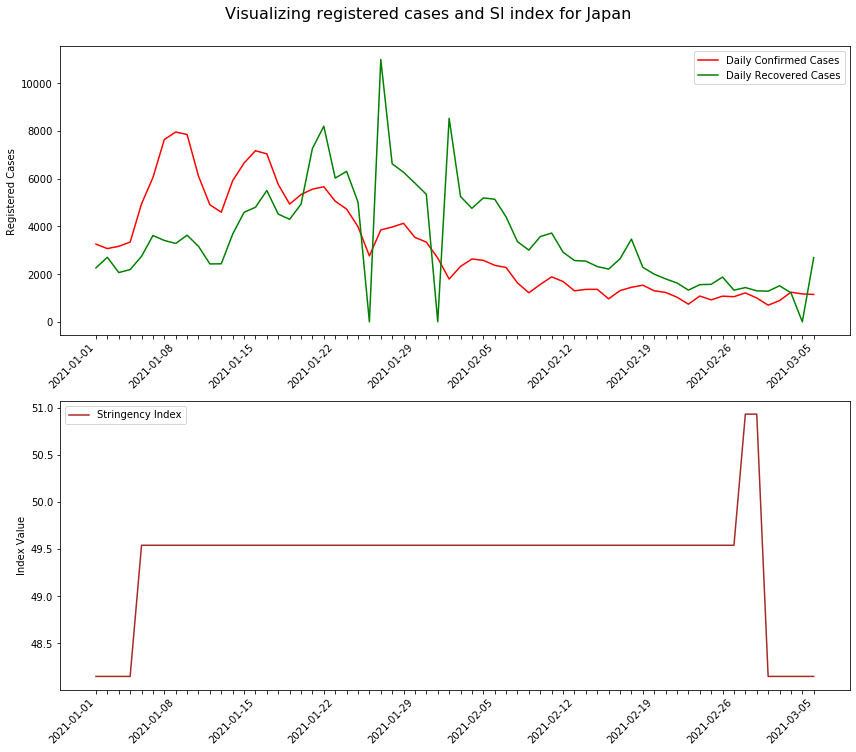

In [17]:
plot_utils.plot_cases_and_index_data(subset_df, 
                                     countries=selected_countries,
                                     continents=None,
                                     plot_columns=selected_columns,
                                     use_continents=use_continents)

In [18]:
start_date           = "2021-06-01"
end_date             = "2021-12-31"
selected_countries   = None
selected_continents  = ["North America", "South America"]
selected_columns     = ["Daily Confirmed Cases", "Daily Death Cases"]
use_continents       = True

subset_df = utils.subsetting_data(df, start_date=start_date, end_date=end_date,
                                  selected_columns=selected_columns,
                                  continents=selected_continents,
                                  countries=selected_countries,
                                  use_continents=use_continents)

utils.initial_dataframe_check(subset_df)

,Values
# Rows,428.0
# Columns,5.0
# Rows with NAs,0.0
# Columns with NAs,0.0
% Null Values in Dataframe,0.0


Plotting two countries or regions for comparison.

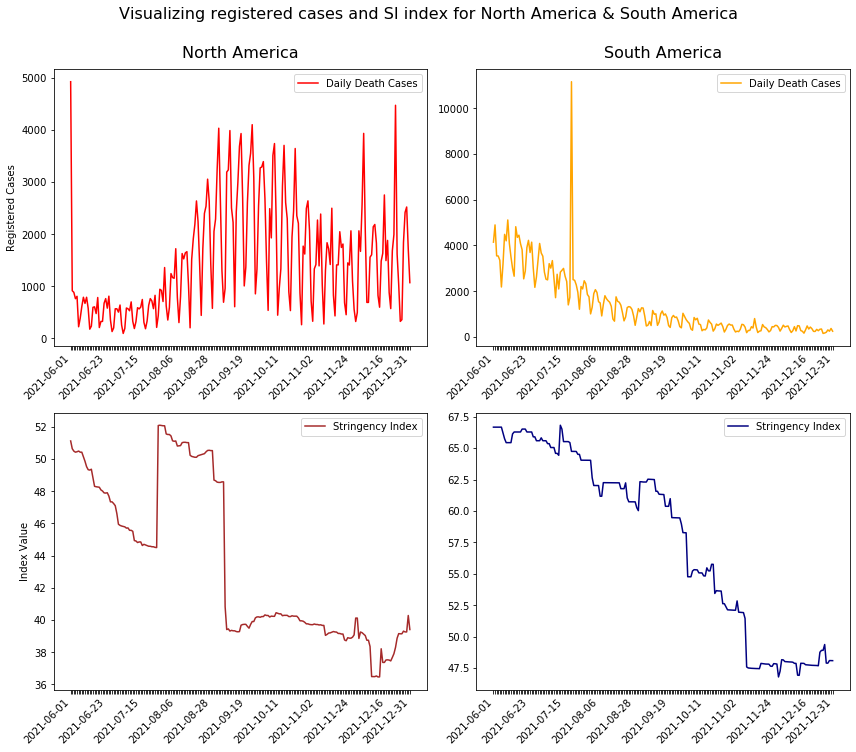

In [19]:
plot_utils.plot_cases_and_index_data_comparison(subset_df, 
                                                countries=None,
                                                continents=selected_continents,
                                                plot_columns=selected_columns[1],
                                                use_continents=True)